## Aim

Process the gender and race coded data. 

Later, codes here became part of `get_authorid_with_vars.py`

In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# names = ['haley', 'jongmin', 'jaemin', 'jeff', 'matthew', 'michelle']
names = ['haley', 'jaemin', 'matthew', 'michelle', 'jongmin', 'jeff']
data_dir = '../../data/interim/gender_race_result'

In [3]:
haley = pd.read_csv(f'{data_dir}/haley.csv')
haley['Coder'] = 'Haley'
matthew = pd.read_csv(f'{data_dir}/matthew.csv')
matthew['Coder'] = 'Matthew'
michelle = pd.read_csv(f'{data_dir}/michelle.csv')
michelle['Coder'] = 'Michelle'
jeff = pd.read_csv(f'{data_dir}/jeff.csv')
jeff['Coder'] = 'Jeff'
jongmin = pd.read_csv(f'{data_dir}/jongmin.csv')
jongmin['Coder'] = 'Jongmin'
jaemin = pd.read_csv(f'{data_dir}/jaemin.csv')
jaemin['Coder'] = 'Jaemin'
jaemin['gender_prediction'] = jaemin['gender_prediction'].str.replace(' M', 'M')

In [4]:
jongmin[jongmin.authorID == '10.1111/j.1460-2466.1962.tb01529.x+2.0']

,Unnamed: 0,authorID,doi,url,year,title,journal,numberOfAuthors,authorPosition,authorFullName,...,affiliation.2,ROR_AFFNAME,matchMethod,ROR_ID,type,gender_prediction,genderpred_api,race_prediction,racepred_api,Coder
1842,4761,10.1111/j.1460-2466.1962.tb01529.x+2.0,10.1111/j.1460-2466.1962.tb01529.x,https://academic.oup.com/joc/article/12/2/90/4...,1962,An Attempt to Quantify the “Abstraction Ladder”,Journal of Communication,3,2,W. W. Lewis,...,2 Dr. Lewis is temporarily Chief Assessment Br...,The New Teacher Project,API_QUERY,https://ror.org/04p9zhq85,R,M,NaN,0,NaN,Jongmin


In [5]:
set(matthew.gender_prediction)

{'F', 'M', 'f', 'm', 'n', nan}

In [6]:
matthew_upperclass_dict = {
    'm': 'M',
    'n': 'N',
    'f': 'F'
}

In [7]:
'''https://stackoverflow.com/a/68046167
'''
for old, new in matthew_upperclass_dict.items():
    matthew['gender_prediction'] = matthew['gender_prediction'].str.replace(old, new, regex=False)

In [8]:
set(jaemin.gender_prediction), set(jongmin.gender_prediction)

({'F', 'M', 'N'}, {'F', 'M'})

In [9]:
set(jeff.gender_prediction), set(matthew.gender_prediction)

({'F', 'M'}, {'F', 'M', 'N', nan})

## Deal with Haley and Michelle data

### Gender

In [10]:
# for haley: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
haley_genderpred = np.where(
    haley.genderpred_api.isnull(), haley["gender_prediction"], haley.genderize)
haley_genderpred[haley_genderpred == 'female'] = 'F'
haley_genderpred[haley_genderpred == 'male'] = 'M'
set(haley_genderpred)

{'F', 'M', 'N', nan}

In [11]:
# for michelle: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
michelle_genderpred = np.where(
    michelle.genderpred_api.isnull(), michelle["gender_prediction"], michelle.genderize)
michelle_genderpred[michelle_genderpred == 'female'] = 'F'
michelle_genderpred[michelle_genderpred == 'male'] = 'M'
set(michelle_genderpred)

{'F', 'M', 'N', nan}

In [12]:
# there are two nans because haley said to rely on genderize which provides nan
np.argwhere(haley_genderpred!=haley_genderpred)

array([[1594],
       [1657]])

In [13]:
# haley.iloc[1657, :]

In [14]:
# there are two nans because michelle said to rely on genderize which provides nan
np.argwhere(michelle_genderpred!=michelle_genderpred)

array([[1586],
       [1606]])

In [15]:
# michelle.iloc[1606, :]

### Race

In [16]:
set(haley.race)

{'api', 'black', 'hispanic', 'white'}

In [17]:
# for haley: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
haley_racepred = np.where(
    haley.racepred_api.isnull(), haley["race_prediction"], haley.race)
haley_racepred[haley_racepred == 'api'] = 2
haley_racepred[haley_racepred == 'hispanic'] = 3
haley_racepred[haley_racepred == 'white'] = 0
set(haley_racepred)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [18]:
# for michelle: if genderpred_api is nan, use gender_prediction, otherwise, use genderize result
michelle_racepred = np.where(
    michelle.racepred_api.isnull(), michelle["race_prediction"], michelle.race)
michelle_racepred[michelle_racepred == 'api'] = 2
michelle_racepred[michelle_racepred == 'hispanic'] = 3
michelle_racepred[michelle_racepred == 'white'] = 0
set(michelle_racepred)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

### Update data

In [19]:
haley['gender_prediction'] = haley_genderpred
michelle['gender_prediction'] = michelle_genderpred
haley['race_prediction'] = haley_racepred
michelle['race_prediction'] = michelle_racepred

## Matthew

In [20]:
Counter(matthew.gender_prediction)

Counter({'M': 1177, 'F': 703, 'N': 1, nan: 3})

In [21]:
Counter(matthew.race_prediction)

Counter({0: 1508, 2: 232, 1: 34, 3: 73, 4: 35, 5: 2})

## Jaemin

In [22]:
Counter(jaemin.gender_prediction)

Counter({'F': 773, 'M': 1110, 'N': 1})

In [23]:
Counter(jaemin.race_prediction)

Counter({0: 1541, 2: 240, 4: 15, 1: 30, 3: 57, 5: 1})

## Jongmin

In [24]:
Counter(jongmin.gender_prediction)

Counter({'F': 749, 'M': 1135})

In [25]:
Counter(jongmin.race_prediction)

Counter({0: 1552, 2: 212, 3: 61, 4: 24, 1: 32, 5: 3})

## Jeff

In [26]:
Counter(jeff.gender_prediction)

Counter({'F': 700, 'M': 1184})

In [27]:
# Counter(jeff.race_prediction)

## Organize data

In [28]:
haley = haley[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(haley.gender_prediction), set(haley.race_prediction)

({'F', 'M', 'N', nan}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [29]:
matthew = matthew[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(matthew.gender_prediction), set(matthew.race_prediction)

({'F', 'M', 'N', nan}, {0, 1, 2, 3, 4, 5})

In [30]:
michelle = michelle[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(michelle.gender_prediction), set(michelle.race_prediction)

({'F', 'M', 'N', nan}, {0.0, 1.0, 2.0, 3.0, 4.0, 5.0})

In [31]:
jaemin = jaemin[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(jaemin.gender_prediction), set(jaemin.race_prediction)

({'F', 'M', 'N'}, {0, 1, 2, 3, 4, 5})

In [32]:
jeff = jeff[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(jeff.gender_prediction)

{'F', 'M'}

In [33]:
jongmin = jongmin[['Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'race_prediction']]
set(jongmin.gender_prediction), set(jongmin.race_prediction)

({'F', 'M'}, {0, 1, 2, 3, 4, 5})

In [34]:
df = pd.concat([haley, michelle, matthew, jaemin, jeff, jongmin], ignore_index = True)
df.sample(10)

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction
682,Haley,Edward,male,10.1111/j.1468-2958.2010.01375.x+2.0,10.1111/j.1468-2958.2010.01375.x,M,0.0
2542,Michelle,Sheila,female,10.1111/j.1460-2466.2011.01554.x+1.0,10.1111/j.1460-2466.2011.01554.x,F,0.0
6143,Jaemin,Avery,male,10.1111/jcc4.12044+3.0,10.1111/jcc4.12044,M,0
3292,Michelle,Lance,male,10.1111/j.1460-2466.1990.tb02265.x+1.0,10.1111/j.1460-2466.1990.tb02265.x,M,0.0
4265,Matthew,Howard,male,10.1111/hcre.12017+2.0,10.1111/hcre.12017,M,0
8958,Jeff,Cynthia,female,10.1111/j.1460-2466.1989.tb01042.x+3.0,10.1111/j.1460-2466.1989.tb01042.x,F,0
9830,Jongmin,Kara,male,10.1111/jcc4.12173+5.0,10.1111/jcc4.12173,F,0
11097,Jongmin,B.,NaN,10.1111/j.1460-2466.1978.tb01559.x+2.0,10.1111/j.1460-2466.1978.tb01559.x,M,0
2051,Michelle,Drew,male,10.1093/hcr/hqy019+5.0,10.1093/hcr/hqy019,M,0.0
3896,Matthew,Alan,male,10.1093/hcr/hqz013+2.0,10.1093/hcr/hqz013,M,0


In [36]:
# These are the nans without considering initial_df

first_try_nan = df[df.gender_prediction.isnull()]
first_try_nan.shape[0]

7

In [37]:
first_try_nans = first_try_nan.authorID.tolist()

## Initial df result

In [38]:
initial_df = pd.read_csv(f'{data_dir}/initial_df.csv')
# initial_df[initial_df.authorID.isin(first_try_nan.authorID)]
initial_df.head()

,Coder,authorID,doi,url,year,title,journal,numberOfAuthors,authorPosition,authorFullName,...,raceDiff,affProcessed,affiliation.2,ROR_AFFNAME,matchMethod,ROR_ID,type,firstNameLength,gender_prediction,Unnamed: 42
0,michelle,10.1111/j.1083-6101.2010.01531.x+2.0,10.1111/j.1083-6101.2010.01531.x,https://academic.oup.com/jcmc/article/16/1/48/...,2010,A Cyber-archaeology Approach to Social Movemen...,Journal of Computer-Mediated Communication,3,2,A. Abbasi,...,0.380590,sheldon b lubar school of business university ...,"2 Sheldon B. Lubar School of Business, Univers...",University of Wisconsin–Milwaukee,API_QUERY,https://ror.org/031q21x57,R,2,M,NaN
1,jeff,10.1111/j.1468-2958.1990.tb00231.x+3.0,10.1111/j.1468-2958.1990.tb00231.x,https://academic.oup.com/hcr/article/17/2/195/...,1990,Memory Representations of Compliance-Gaining S...,Human Communication Research,3,3,A. E. Lindsey,...,0.538784,a e lindsey is assistant professor of speech c...,3 A. E. Lindsey is Assistant Professor of Spee...,University of Georgia,Exact,https://ror.org/02bjhwk41,R,2,NaN,M
2,matthew,10.1111/j.1468-2958.1989.tb00207.x+2.0,10.1111/j.1468-2958.1989.tb00207.x,https://academic.oup.com/hcr/article/16/1/120/...,1989,Encoding Processes in the Production of Multip...,Human Communication Research,2,2,A. E. Lindsey,...,0.538784,john o greene is an associate professor and a ...,"1 John O. Greene is an Associate Professor, an...",Łukasiewicz Research Network - Institute of We...,API_QUERY,https://ror.org/05xx8bb48,R,2,NaN,M
3,michelle,10.1111/j.1460-2466.1981.tb00463.x+1.0,10.1111/j.1460-2466.1981.tb00463.x,https://academic.oup.com/joc/article/31/4/164/...,1981,U.S. News Coverage of the Belgrade UNESCO Conf...,Journal of Communication,1,1,A. H. Raskin,...,0.767133,a h raskin former assistant editor of the edit...,"1 A. H. Raskin, former assistant editor of the...",Museum of the City of New York,API_QUERY,https://ror.org/00mct1g07,R,2,M,NaN
4,matthew,10.1111/hcre.12092+1.0,10.1111/hcre.12092,https://academic.oup.com/hcr/article/42/4/641/...,2016,Partisan Provocation: The Role of Partisan New...,Human Communication Research,2,1,A. Hasell,...,0.584822,department of communication university of cali...,"1 Department of Communication, University of C...","University of California, Santa Barbara",API_QUERY,https://ror.org/02t274463,R,2,F,NaN


In [39]:
authorid_gender_dict = dict(zip(df.authorID, df.gender_prediction))
initial_df_authorid_gender_dict = dict(zip(initial_df.authorID, initial_df.gender_prediction))
authorid_gender_dict.update(initial_df_authorid_gender_dict)

In [40]:
authorid_gender_dict['10.1111/j.1460-2466.1962.tb01529.x+2.0']

nan

In [41]:
# the update works!
authorid_gender_dict[first_try_nan.authorID.tolist()[2]]

'M'

## New df

Now, I will create a new df using the updated authorid gender dict. 

In [42]:
df['gender_prediction_new'] = [authorid_gender_dict[x] for x in df['authorID']]
diff = df[df.gender_prediction != df.gender_prediction_new]
diff[diff.gender_prediction.notnull()][[
    'Coder', 'firstName', 'genderize', 'authorID', 'doi', 'gender_prediction', 'gender_prediction_new']]

,Coder,firstName,genderize,authorID,doi,gender_prediction,gender_prediction_new
208,Haley,C,male,10.1093/ccc/tcy019+1.0,10.1093/ccc/tcy019,M,F
2019,Michelle,E,male,10.1093/jcmc/zmaa006+2.0,10.1093/jcmc/zmaa006,F,M
2434,Michelle,K.,NaN,10.1111/jcom.12008+4.0,10.1111/jcom.12008,F,M
3006,Michelle,C.,NaN,10.1111/j.1460-2466.2002.tb02577.x+3.0,10.1111/j.1460-2466.2002.tb02577.x,M,F
3322,Michelle,B.,NaN,10.1111/j.1468-2958.1988.tb00162.x+4.0,10.1111/j.1468-2958.1988.tb00162.x,F,M
4097,Matthew,A.,NaN,10.1111/hcre.12092+1.0,10.1111/hcre.12092,M,F
5213,Matthew,A.,NaN,10.1111/j.1468-2958.1989.tb00207.x+2.0,10.1111/j.1468-2958.1989.tb00207.x,M,NaN
5671,Jaemin,C,male,10.1093/ccc/tcac013+1.0,10.1093/ccc/tcac013,M,N
6857,Jaemin,H.,NaN,10.1111/j.1468-2885.1999.tb00208.x+1.0,10.1111/j.1468-2885.1999.tb00208.x,F,M
7479,Jaemin,L.,NaN,10.1111/j.1460-2466.1968.tb00051.x+1.0,10.1111/j.1460-2466.1968.tb00051.x,F,M


In [43]:
# set(df.gender_prediction_up)
df.head()

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction,gender_prediction_new
0,Haley,Ben,male,10.1093/jcmc/zmab024+1.0,10.1093/jcmc/zmab024,M,1.0,M
1,Haley,Xuanjun,male,10.1093/joc/jqab044+4.0,10.1093/joc/jqab044,M,2.0,M
2,Haley,Jonathan,male,10.1093/hcr/hqab020+1.0,10.1093/hcr/hqab020,M,0.0,M
3,Haley,Anne,female,10.1093/hcr/hqac004+1.0,10.1093/hcr/hqac004,F,0.0,F
4,Haley,Sophie,female,10.1093/jcmc/zmab019+5.0,10.1093/jcmc/zmab019,F,0.0,F


### nans after update

In [44]:
df[df.gender_prediction_new.isnull()].shape[0]

6

In [45]:
update_nan = df[df.gender_prediction_new.isnull()]
update_nans = update_nan.authorID.tolist()
len(update_nans)

6

In [46]:
df.shape

(11304, 8)

In [49]:
df[df.gender_prediction_new.notnull()].shape

(11298, 8)

## to delete those without gender predictions

In [56]:
to_delete_dois = list(set(df[df.gender_prediction_new.isnull()].doi))
to_keep_dois = list(set([x for x in df.doi.tolist() if x not in to_delete_dois]))
len(to_delete_dois), len(to_keep_dois)

(6, 5712)

In [63]:
df.shape

(11304, 8)

In [64]:
df.query('doi == @to_keep_dois').shape

(11292, 8)

In [62]:
df.query('doi == @to_keep_dois').head()

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction,gender_prediction_new
0,Haley,Ben,male,10.1093/jcmc/zmab024+1.0,10.1093/jcmc/zmab024,M,1.0,M
1,Haley,Xuanjun,male,10.1093/joc/jqab044+4.0,10.1093/joc/jqab044,M,2.0,M
2,Haley,Jonathan,male,10.1093/hcr/hqab020+1.0,10.1093/hcr/hqab020,M,0.0,M
3,Haley,Anne,female,10.1093/hcr/hqac004+1.0,10.1093/hcr/hqac004,F,0.0,F
4,Haley,Sophie,female,10.1093/jcmc/zmab019+5.0,10.1093/jcmc/zmab019,F,0.0,F


## Update race

In [417]:
def recode_race(row):
    race_txt = 'race_prediction'
    if row[race_txt] == 0:
        return 'White'
    elif row[race_txt] == 1:
        return 'Black'
    elif row[race_txt] == 2:
        return 'Asian'
    elif row[race_txt] == 3:
        return 'Hispanic'
    elif row[race_txt] == 4:
        return 'Middle Eastern'
    elif row[race_txt] == 5:
        return 'Indigenous'

In [418]:
df['race'] = df.apply(recode_race, axis = 1)

In [419]:
df.head()

,Coder,firstName,genderize,authorID,doi,gender_prediction,race_prediction,gender_prediction_new,race
0,Haley,Ben,male,10.1093/jcmc/zmab024+1.0,10.1093/jcmc/zmab024,M,1.0,M,Black
1,Haley,Xuanjun,male,10.1093/joc/jqab044+4.0,10.1093/joc/jqab044,M,2.0,M,Asian
2,Haley,Jonathan,male,10.1093/hcr/hqab020+1.0,10.1093/hcr/hqab020,M,0.0,M,White
3,Haley,Anne,female,10.1093/hcr/hqac004+1.0,10.1093/hcr/hqac004,F,0.0,F,White
4,Haley,Sophie,female,10.1093/jcmc/zmab019+5.0,10.1093/jcmc/zmab019,F,0.0,F,White


<AxesSubplot:xlabel='race', ylabel='count'>

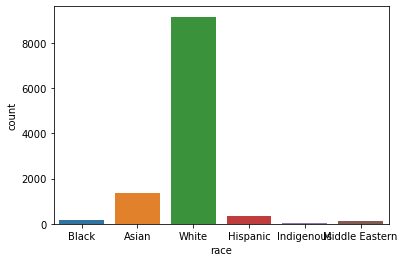

In [420]:
sns.countplot(x = 'race', data = df)

In [422]:
set(df.gender_prediction_new)

{'F', 'M', 'N', nan}

<AxesSubplot:xlabel='gender_prediction_new', ylabel='count'>

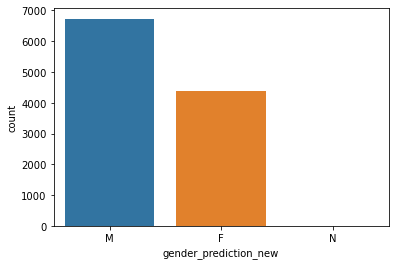

In [423]:
sns.countplot(x = 'gender_prediction_new', data = df)

In [424]:
df['race_plus_gender'] = df['race'] + df['gender_prediction_new']

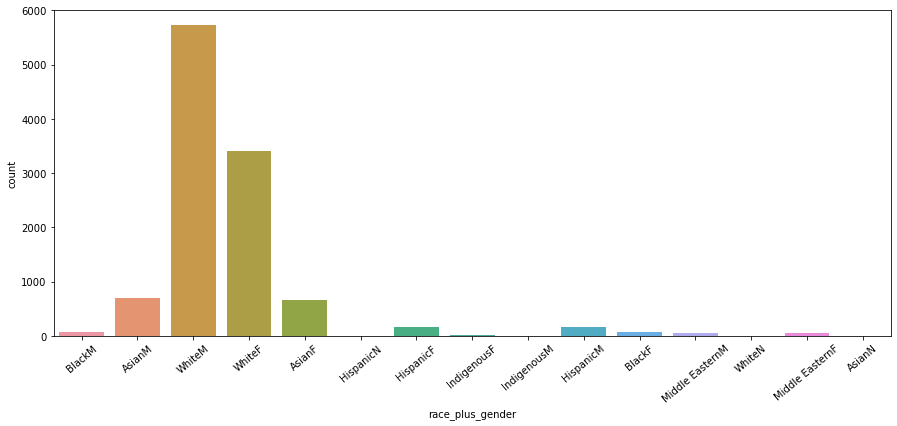

In [425]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'race_plus_gender', data = df)
# plt.xticks(rotation=45)
ax.tick_params(axis='x', rotation=40)

In [426]:
df.shape

(11304, 10)

## Checking affiliation

In [111]:
aff_df = pd.read_csv('aff_df.csv')
aff_df = aff_df[['authorID', 'new_country_code', 'new_afftype']]
aff_df

,authorID,new_country_code,new_afftype
0,10.1093/jcmc/zmab019+4.0,AT,Education
1,10.1093/jcmc/zmab019+5.0,AT,Education
2,10.1093/joc/jqab052+5.0,US,Education
3,10.1093/ccc/tcac007+1.0,CN,Education
4,10.1093/joc/jqac012+4.0,US,Education
...,...,...,...
4429,10.1111/j.1083-6101.2010.01508.x+7.0,US,Education
4430,10.1111/j.1753-9137.2010.01073.x+2.0,MX,Education
4431,10.1111/j.1083-6101.2010.01532.x+1.0,US,Education
4432,10.1111/j.1753-9137.2010.01079.x+1.0,US,Education


In [114]:
pd.merge(aff_df, df, on = 'authorID')

,authorID,new_country_code,new_afftype,gender_prediction,race_prediction,race,race_plus_gender
0,10.1093/jcmc/zmab019+4.0,AT,Education,F,0.0,White,WhiteF
1,10.1093/jcmc/zmab019+5.0,AT,Education,F,0.0,White,WhiteF
2,10.1093/joc/jqab052+5.0,US,Education,F,2.0,Asian,AsianF
3,10.1093/ccc/tcac007+1.0,CN,Education,F,0.0,White,WhiteF
4,10.1093/joc/jqac012+4.0,US,Education,M,0.0,White,WhiteM
...,...,...,...,...,...,...,...
4429,10.1111/j.1083-6101.2010.01508.x+7.0,US,Education,F,0.0,White,WhiteF
4430,10.1111/j.1753-9137.2010.01073.x+2.0,MX,Education,M,3.0,Hispanic,HispanicM
4431,10.1111/j.1083-6101.2010.01532.x+1.0,US,Education,F,3.0,Hispanic,HispanicF
4432,10.1111/j.1753-9137.2010.01079.x+1.0,US,Education,F,2.0,Asian,AsianF


In [116]:
set(aff_df.authorID) == set(df.authorID)

True